Introduction
======== 
This notebook explores the **MTA Subway Hourly Ridership Beginning July 2020** dataset, which provides valueable insights into ridership patterns on the NYC Subway system. 

Setup
-------- 

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

print("Setup Successful!")

Setup Successful!


In [87]:
#Load data, note that is this a sample
df = pd.read_csv("MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv", 
                 skiprows=lambda i: i > 0 and i % 10 != 0)  # Take every 10th row
print("Upload Successful")


Upload Successful


Basic Analysis
-------- 

In [88]:
df.shape

(10977638, 12)

In [89]:
df.columns

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10977638 entries, 0 to 10977637
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            int64  
 8   transfers            int64  
 9   latitude             float64
 10  longitude            float64
 11  Georeference         object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1005.0+ MB


In [91]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,12/22/2022 03:00:00 AM,subway,118,3 Av (L),Manhattan,metrocard,Metrocard - Fair Fare,1,0,40.732850,-73.986120,POINT (-73.98612 40.73285)
1,12/22/2022 03:00:00 AM,subway,374,E 143 St-St Mary's St (6),Bronx,omny,OMNY - Full Fare,1,0,40.808720,-73.907650,POINT (-73.90765 40.80872)
2,12/22/2022 11:00:00 AM,subway,424,"Pelham Pkwy (2,5)",Bronx,metrocard,Metrocard - Other,9,1,40.857193,-73.867615,POINT (-73.867615 40.857193)
3,12/22/2022 04:00:00 AM,subway,341,"Eastern Pkwy-Brooklyn Museum (2,3)",Brooklyn,metrocard,Metrocard - Full Fare,2,0,40.671986,-73.964380,POINT (-73.96438 40.671986)
4,12/22/2022 10:00:00 AM,subway,113,Knickerbocker Av (M),Brooklyn,metrocard,Metrocard - Other,1,0,40.698666,-73.919710,POINT (-73.91971 40.698666)


In [92]:
df.tail()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
10977633,12/22/2022 07:00:00 PM,subway,103,"Bowery (J,Z)",Manhattan,metrocard,Metrocard - Students,2,0,40.720280,-73.993910,POINT (-73.99391 40.72028)
10977634,12/22/2022 05:00:00 PM,subway,37,77 St (R),Brooklyn,metrocard,Metrocard - Full Fare,41,1,40.629740,-74.025510,POINT (-74.02551 40.62974)
10977635,12/22/2022 07:00:00 AM,subway,345,"Crown Hts-Utica Av (3,4)",Brooklyn,metrocard,Metrocard - Fair Fare,84,10,40.668896,-73.932945,POINT (-73.932945 40.668896)
10977636,12/22/2022 08:00:00 PM,subway,403,33 St (6),Manhattan,metrocard,Metrocard - Students,11,0,40.746082,-73.982080,POINT (-73.98208 40.746082)
10977637,12/22/2022 04:00:00 PM,subway,430,"Simpson St (2,5)",Bronx,metrocard,Metrocard - Fair Fare,28,2,40.824074,-73.893070,POINT (-73.89307 40.824074)


Data Prep
-------- 

In [93]:
#Changing transit_timestamp to datetime
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])


In [94]:
#Find rows w/o proper format
malformed_rows = df[~df['station_complex'].str.contains(r'\(.+\)', na=False)]
print(malformed_rows)

Empty DataFrame
Columns: [transit_timestamp, transit_mode, station_complex_id, station_complex, borough, payment_method, fare_class_category, ridership, transfers, latitude, longitude, Georeference]
Index: []


In [95]:
#Fix rows
df['station_name'] = df['station_complex'].str.extract(r'^(.*?)\s*\(')  # Anything before '('
df['lines'] = df['station_complex'].str.extract(r'\((.*)\)')  # Anything inside '(' and ')'

In [96]:
# Split lines into separate columns
line_columns = df['lines'].str.split(',', expand=True)

# Rename columns (e.g., Line_1, Line_2)
line_columns.columns = [f'Line_{i+1}' for i in range(line_columns.shape[1])]

# Concatenate with the original DataFrame
df = pd.concat([df, line_columns], axis=1)

df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,...,Line_2,Line_3,Line_4,Line_5,Line_6,Line_7,Line_8,Line_9,Line_10,Line_11
0,2022-12-22 03:00:00,subway,118,3 Av (L),Manhattan,metrocard,Metrocard - Fair Fare,1,0,40.732850,...,None,None,None,None,None,None,None,None,None,None
1,2022-12-22 03:00:00,subway,374,E 143 St-St Mary's St (6),Bronx,omny,OMNY - Full Fare,1,0,40.808720,...,None,None,None,None,None,None,None,None,None,None
2,2022-12-22 11:00:00,subway,424,"Pelham Pkwy (2,5)",Bronx,metrocard,Metrocard - Other,9,1,40.857193,...,5,None,None,None,None,None,None,None,None,None
3,2022-12-22 04:00:00,subway,341,"Eastern Pkwy-Brooklyn Museum (2,3)",Brooklyn,metrocard,Metrocard - Full Fare,2,0,40.671986,...,3,None,None,None,None,None,None,None,None,None
4,2022-12-22 10:00:00,subway,113,Knickerbocker Av (M),Brooklyn,metrocard,Metrocard - Other,1,0,40.698666,...,None,None,None,None,None,None,None,None,None,None


In [97]:
#Unique values of transit mode
transit_mode = df['transit_mode'].unique()
print("Transit Mode:", transit_mode)

Transit Mode: ['subway' 'staten_island_railway' 'tram']


In [98]:
#Unique values of boroughs
boroughs = df['borough'].unique()
print('Boroughs:', boroughs)

Boroughs: ['Manhattan' 'Bronx' 'Brooklyn' 'Queens' 'Staten Island']


In [99]:
#Unique Payment Methods
payment_method = df['payment_method'].unique()
print("Payment Method:", payment_method)

Payment Method: ['metrocard' 'omny']


In [100]:
#convert transit_mode, borough, and payment_method to category
df['transit_mode'] = df['transit_mode'].astype('category')
df['borough'] =df['borough'].astype('category')
df['payment_method']=df['payment_method'].astype('category')
df['fare_class_category']=df['fare_class_category'].astype('category')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10977638 entries, 0 to 10977637
Data columns (total 25 columns):
 #   Column               Dtype         
---  ------               -----         
 0   transit_timestamp    datetime64[ns]
 1   transit_mode         category      
 2   station_complex_id   object        
 3   station_complex      object        
 4   borough              category      
 5   payment_method       category      
 6   fare_class_category  category      
 7   ridership            int64         
 8   transfers            int64         
 9   latitude             float64       
 10  longitude            float64       
 11  Georeference         object        
 12  station_name         object        
 13  lines                object        
 14  Line_1               object        
 15  Line_2               object        
 16  Line_3               object        
 17  Line_4               object        
 18  Line_5               object        
 19  Line_6             

EDA
--------

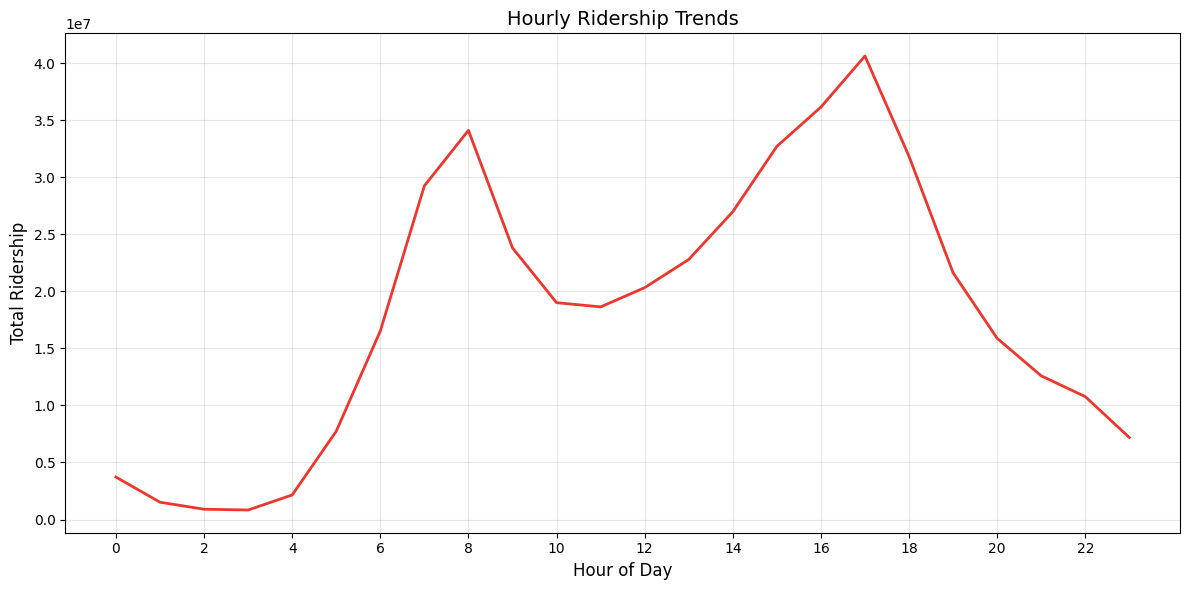

In [102]:
#EDA!
#Hourly Ridership Trends
df['hour'] = pd.to_datetime(df['transit_timestamp']).dt.hour
hourly_ridership = df.groupby('hour')['ridership'].sum().reset_index()
#Plot hourly ridership
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_ridership, x='hour', y='ridership', color='#EE352E', linewidth=2)
plt.title('Hourly Ridership Trends', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Ridership', fontsize=12)
plt.xticks(range(0, 24, 2))  # Show every 2nd hour for clarity
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

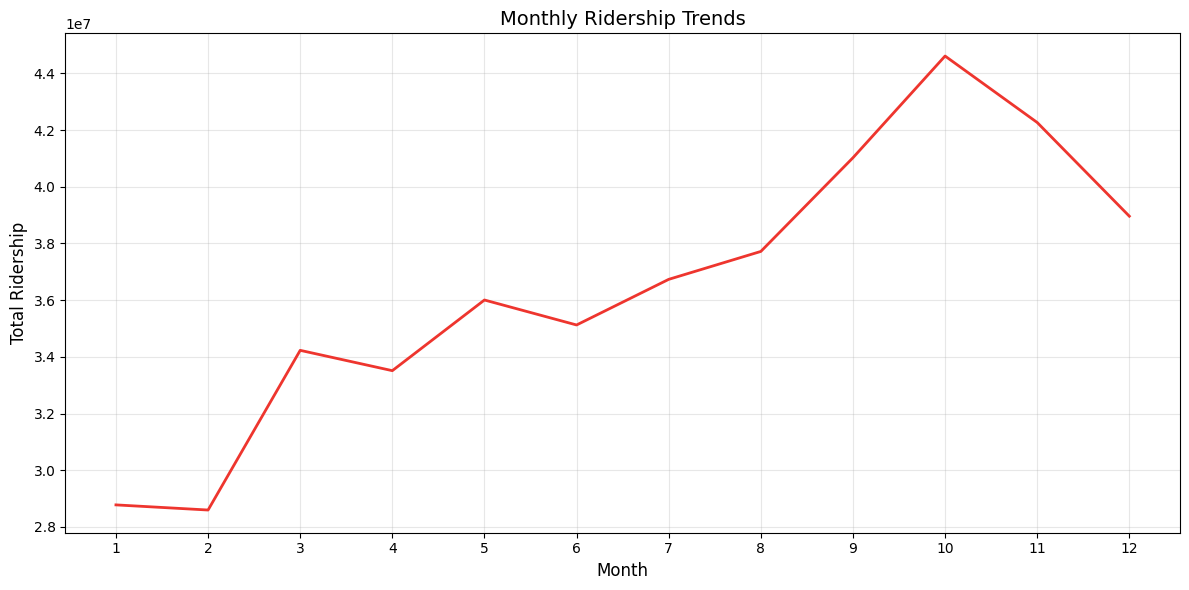

In [ ]:
df['month'] = pd.to_datetime(df['transit_timestamp']).dt.month
monthly_ridership = df.groupby('month')['ridership'].sum().reset_index()

#Plot Monthly Ridership
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_ridership, x='month', y='ridership', color='#EE352E', linewidth=2)
plt.title('Monthly Ridership Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Ridership', fontsize=12)
plt.xticks(range(1, 13))  # Show every month
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

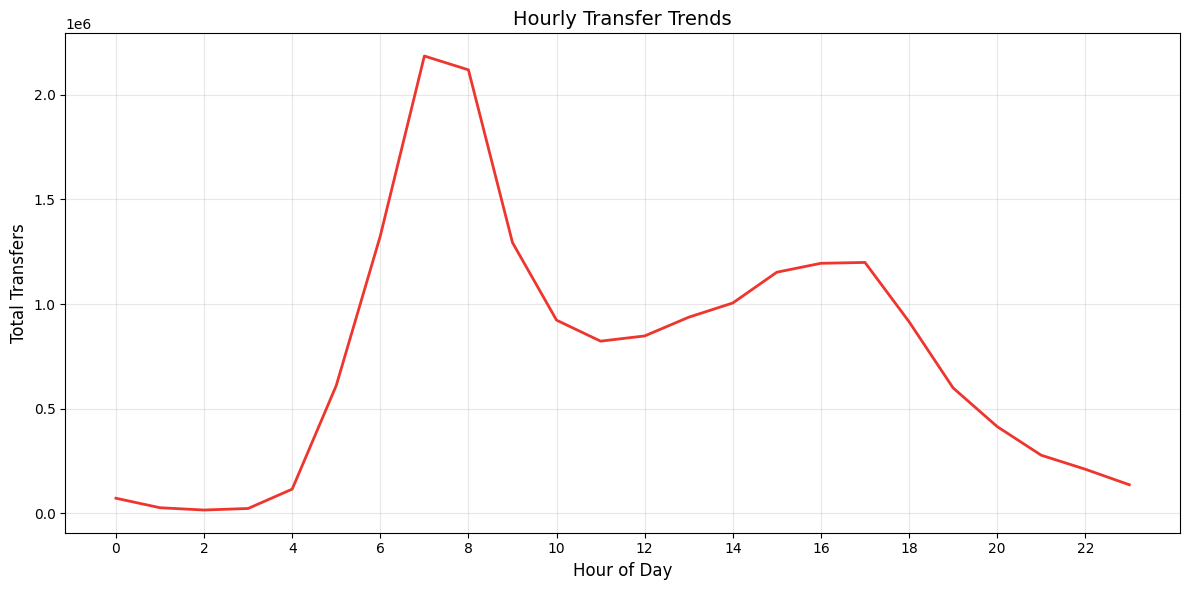

In [110]:
#Hourly Transfers
hourly_transfers = df.groupby('hour')['transfers'].sum().reset_index()
#Plot hourly transfers
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_transfers, x='hour', y='transfers', color='#EE352E', linewidth=2)
plt.title('Hourly Transfer Trends', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Transfers', fontsize=12)
plt.xticks(range(0, 24, 2))  # Show every 2nd hour for clarity
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

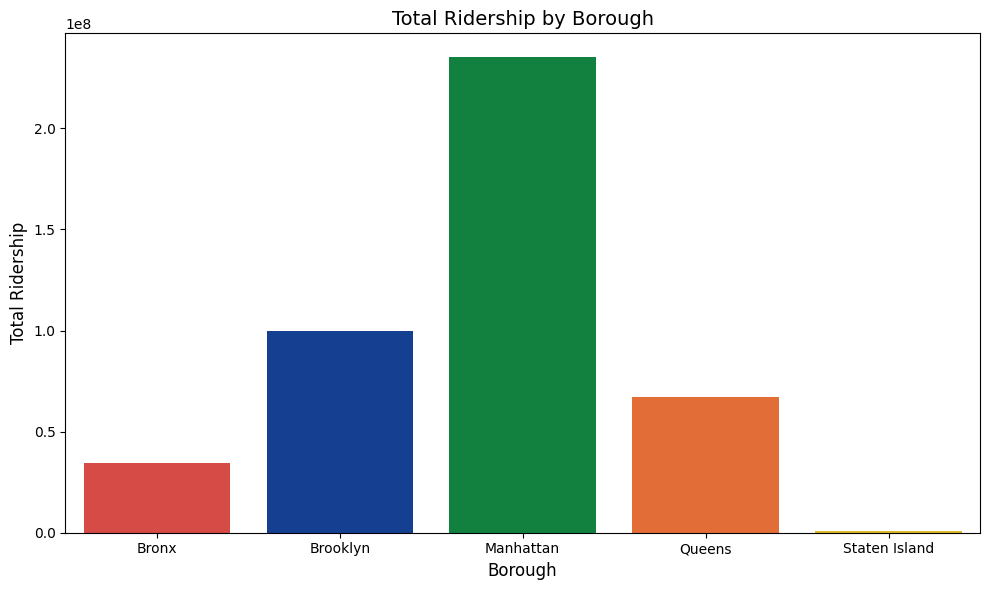

In [104]:
#Ridership by borough
borough_ridership = df.groupby('borough')['ridership'].sum().reset_index()
#Plot ridership by borough
plt.figure(figsize=(10,6))
sns.barplot(data=borough_ridership, x='borough', y='ridership', palette=['#EE352E', '#0039A6', '#00933C', '#FF6319', '#FCCC0A'])
plt.title('Total Ridership by Borough', fontsize=14)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Total Ridership', fontsize=12)
plt.tight_layout()
plt.show()

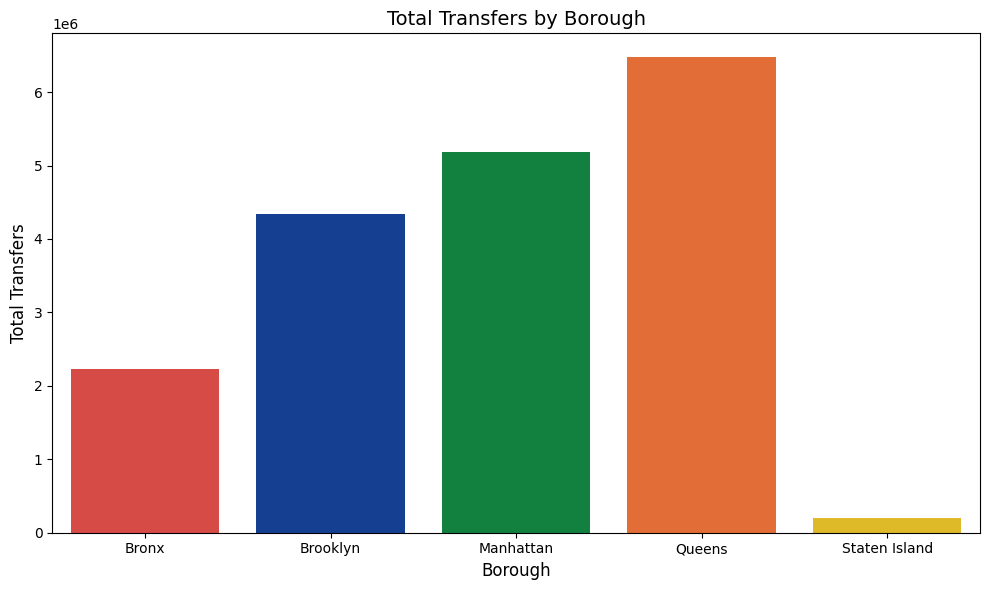

In [111]:
#Transfers by Borough
borough_transfers = df.groupby('borough')['transfers'].sum().reset_index()
#Plot ridership by borough
plt.figure(figsize=(10,6))
sns.barplot(data=borough_transfers, x='borough', y='transfers', palette=['#EE352E', '#0039A6', '#00933C', '#FF6319', '#FCCC0A'])
plt.title('Total Transfers by Borough', fontsize=14)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Total Transfers', fontsize=12)
plt.tight_layout()
plt.show()

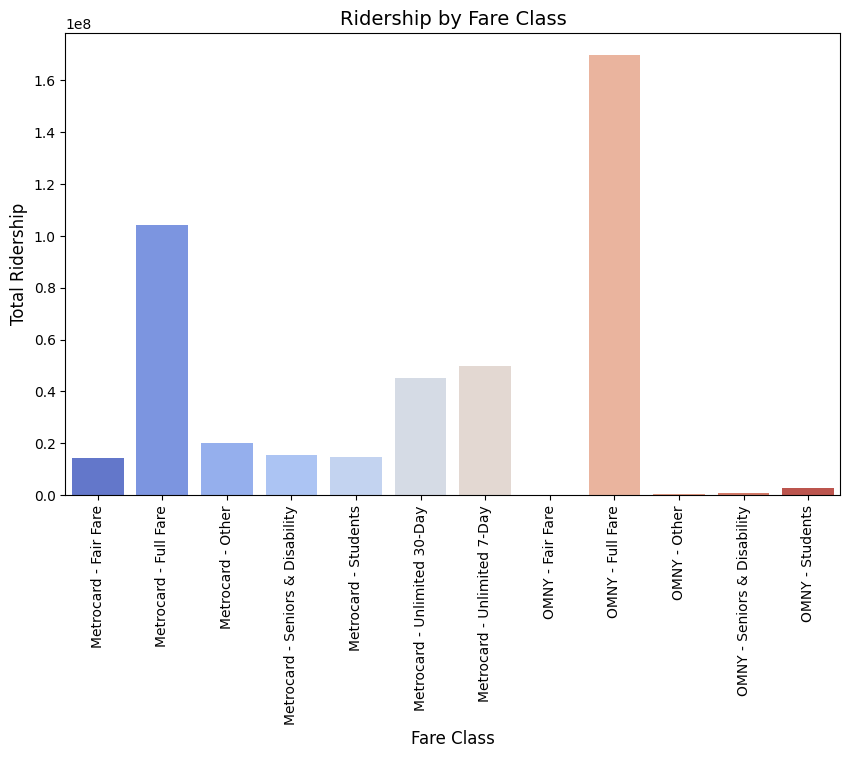

In [105]:
#Ridership by Fare Type
fare_ridership =df.groupby('fare_class_category')['ridership'].sum().reset_index()
#Plot ridership by fare type
plt.figure(figsize=(10,6))
sns.barplot(data=fare_ridership, x='fare_class_category', y='ridership', palette='coolwarm')
plt.title('Ridership by Fare Class', fontsize=14)
plt.xlabel('Fare Class', fontsize=12)
plt.ylabel('Total Ridership', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

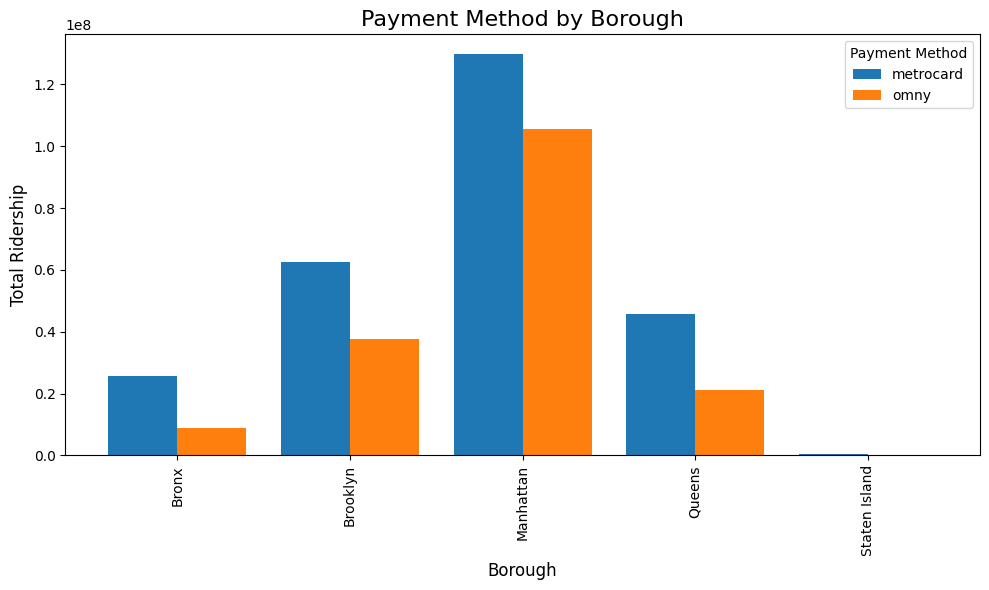

In [114]:
#Payment method by borough
borough_payment = df.groupby(['borough', 'payment_method'])['ridership'].sum().reset_index()
pivot_data = borough_payment.pivot(index='borough', columns='payment_method', values='ridership').fillna(0)
#Plot ridership by borough
pivot_data.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Payment Method by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Total Ridership', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Payment Method', fontsize=10)
plt.tight_layout()
plt.show()